## Welcome

This is material for the **Directed Acyclical Graphs** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

import plotnine as p

In [3]:
# read data
def read_data(file):
    return pd.read_csv("https://raw.github.com/scunning1975/mixtape/master/" + file)


## Collider - Discrimination

In [4]:
tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb['discrimination'] = tb.female.copy()
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 

In [5]:

lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()


st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

#### QUESTIONS
- What is the true direct effect of discrimination on wages?  
- Explain the channels by which discrimination impacts wages.  
- What makes occupation a collider?
- What controls are necessary to eliminate this collider bias?



## Movie Star

In [6]:
start_is_born = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})
    
start_is_born['score'] = start_is_born['beauty'] + start_is_born['talent']
start_is_born['c85'] = np.percentile(start_is_born['score'], q=85)
start_is_born['star'] = 0
start_is_born.loc[start_is_born['score']>start_is_born['c85'], 'star'] = 1
start_is_born.head()

,beauty,talent,score,c85,star
0,0.921462,-0.990310,-0.068848,1.44152,0
1,-0.804984,-0.912247,-1.717231,1.44152,0
2,-0.591668,-0.082271,-0.673939,1.44152,0
3,-1.022608,-2.539627,-3.562235,1.44152,0
4,-0.156894,-0.131955,-0.288848,1.44152,0


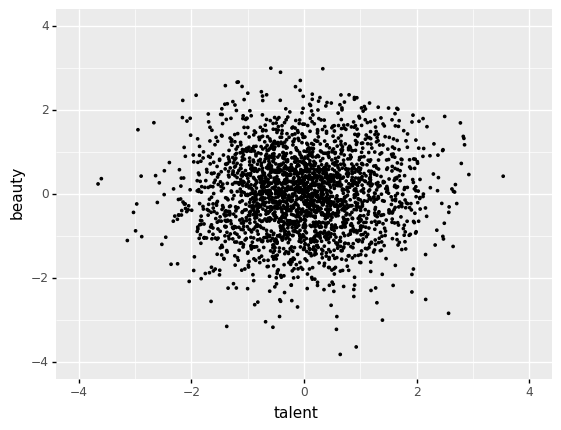

<ggplot: (8775105510946)>

In [6]:
lm = sm.OLS.from_formula('beauty ~ talent', data=start_is_born).fit()

p.ggplot(start_is_born, p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

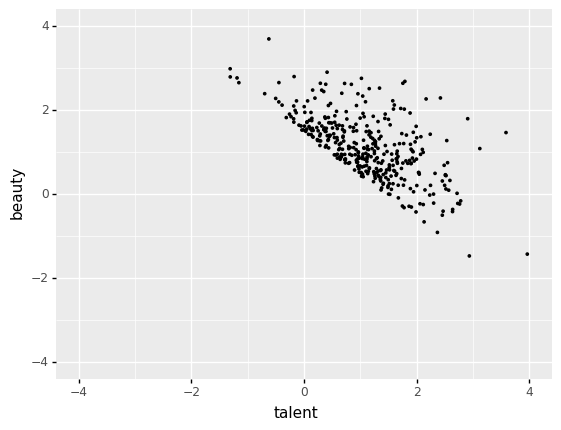

<ggplot: (8789615634595)>

In [7]:
p.ggplot(start_is_born[start_is_born.star==1], p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

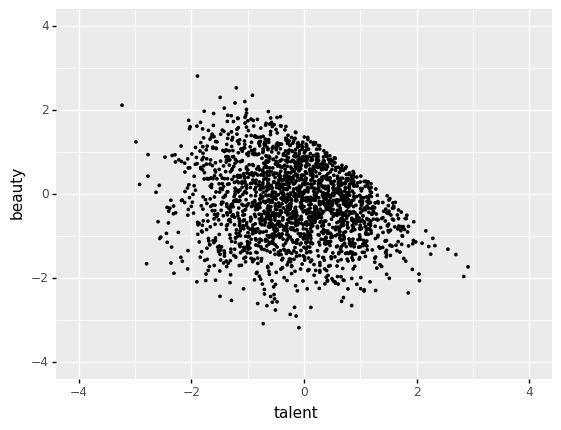

<ggplot: (8789616089878)>

In [8]:
p.ggplot(start_is_born[start_is_born.star==0], p.aes(x='talent', y='beauty')) +\
    p.geom_point(size = 0.5) +\
    p.xlim(-4, 4) +\
    p.ylim(-4, 4)

#### QUESTIONS
- What is the correlation between talent and beauty among stars?  Non-stars?
- But what is the correlation between talent and beauty in the population?